<a href="https://colab.research.google.com/github/minkyung172/2022_ML_study_winter/blob/main/EDA_dememtia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('/content/CTX_Demo_n506.xlsx')
df.head()

,GWAS_hos,ID,FAM1,FAM2,RID,RID_no,Age,Sex,Edu,Dx,...,RightInferiorParietal,RightInferiorTemporal,RightIsthmusCingulate,RightLateralOccipital,RightLateralOrbitofrontal,RightLingual,RightMedialOrbitofrontal,RightMiddleTemporal,Time_PETMRI,ABS(Time)
0,2,4799,3,002_S_4799,4799,480,70,1,14,1,...,2.493,2.992,2.427,2.267,2.614,2.035,2.397,3.049,8,8
1,4,5178,5,002_S_5178,5178,661,69,1,18,0,...,2.484,2.880,2.295,2.321,2.514,1.921,2.333,2.981,20,20
2,5,5256,6,002_S_5256,5256,699,72,2,20,0,...,2.505,3.055,2.652,2.262,2.680,2.010,2.347,2.990,-2,2
3,6,4524,7,003_S_4524,4524,404,72,1,19,1,...,2.558,2.875,2.640,2.169,2.367,2.040,2.601,2.973,145,145
4,7,4644,8,003_S_4644,4644,420,68,2,14,0,...,2.102,2.702,2.341,2.106,2.331,1.839,2.250,2.693,34,34


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 83 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   GWAS_hos                       506 non-null    int64  
 1   ID                             506 non-null    int64  
 2   FAM1                           506 non-null    int64  
 3   FAM2                           506 non-null    object 
 4   RID                            506 non-null    int64  
 5   RID_no                         506 non-null    int64  
 6   Age                            506 non-null    int64  
 7   Sex                            506 non-null    int64  
 8   Edu                            506 non-null    int64  
 9   Dx                             506 non-null    int64  
 10  APOEe4                         506 non-null    int64  
 11  111CUTOFF                      506 non-null    int64  
 12  SupraTentorial                 506 non-null    int

In [4]:
df.describe()

,GWAS_hos,ID,FAM1,RID,RID_no,Age,Sex,Edu,Dx,APOEe4,...,RightInferiorParietal,RightInferiorTemporal,RightIsthmusCingulate,RightLateralOccipital,RightLateralOrbitofrontal,RightLingual,RightMedialOrbitofrontal,RightMiddleTemporal,Time_PETMRI,ABS(Time)
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,...,506.00000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,377.373518,4130.187747,540.604743,4130.187747,341.503953,73.583004,1.468379,16.369565,0.577075,0.432806,...,2.36065,2.772565,2.415156,2.169229,2.490259,1.942998,2.320344,2.798601,11.181818,17.272727
std,200.084944,1026.547023,341.742353,1026.547023,214.714660,6.957724,0.499493,2.606880,0.494513,0.603973,...,0.15515,0.176672,0.223288,0.161686,0.159392,0.140083,0.181139,0.163820,49.810518,48.035720
min,2.000000,2002.000000,3.000000,2002.000000,1.000000,55.000000,1.000000,8.000000,0.000000,0.000000,...,1.65600,2.198000,1.620000,1.743000,1.967000,1.575000,1.651000,2.011000,-370.000000,0.000000
25%,210.250000,4072.250000,232.500000,4072.250000,157.250000,69.000000,1.000000,14.000000,0.000000,0.000000,...,2.26400,2.668250,2.263250,2.054000,2.374000,1.840250,2.195000,2.698500,0.000000,1.000000
50%,392.500000,4358.000000,533.000000,4358.000000,326.500000,73.000000,1.000000,16.000000,1.000000,0.000000,...,2.37100,2.771500,2.406500,2.166500,2.494000,1.940000,2.312000,2.801000,5.000000,8.000000
75%,546.750000,4875.500000,827.750000,4875.500000,516.750000,78.000000,2.000000,18.000000,1.000000,1.000000,...,2.46700,2.880750,2.569000,2.275750,2.594750,2.041000,2.433000,2.907750,20.000000,21.000000
max,713.000000,5295.000000,1173.000000,5295.000000,723.000000,92.000000,2.000000,20.000000,1.000000,2.000000,...,2.77900,3.338000,3.051000,2.654000,3.139000,2.354000,3.406000,3.238000,927.000000,927.000000


In [11]:
df.isnull().sum()

ID                          0
Age                         0
Sex                         0
Edu                         0
Dx                          0
                           ..
RightLingual                0
RightMedialOrbitofrontal    0
RightMiddleTemporal         0
Time_PETMRI                 0
ABS(Time)                   0
Length: 78, dtype: int64

In [5]:
df['111CUTOFF'].value_counts()

0    291
1    215
Name: 111CUTOFF, dtype: int64

In [10]:
df.shape 

(506, 78)

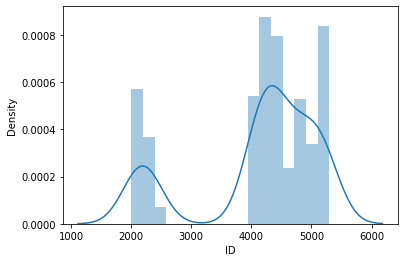

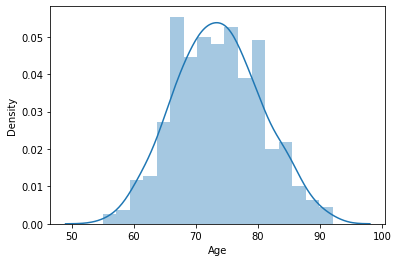

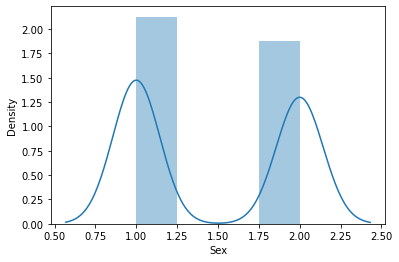

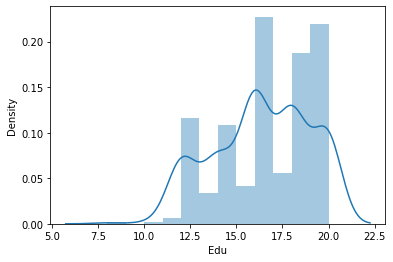

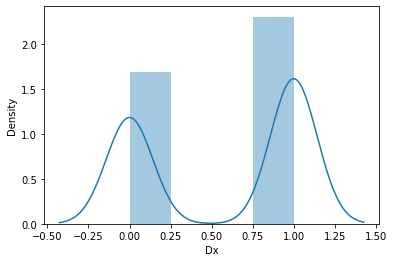

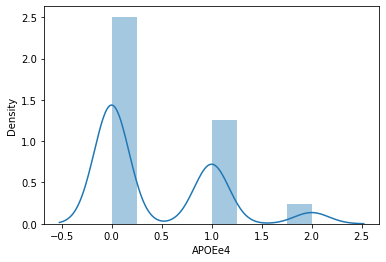

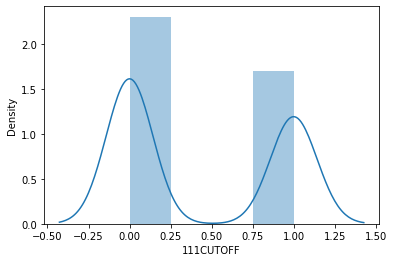

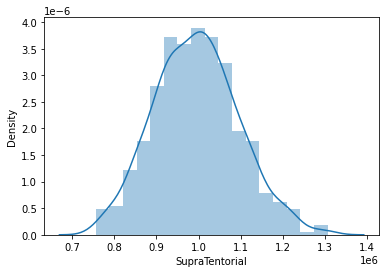

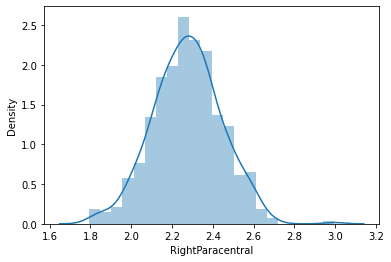

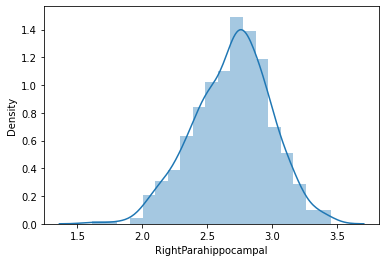

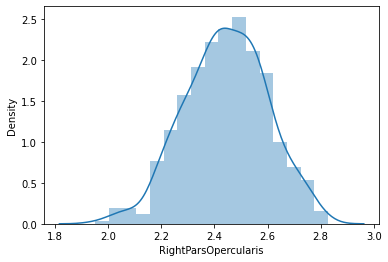

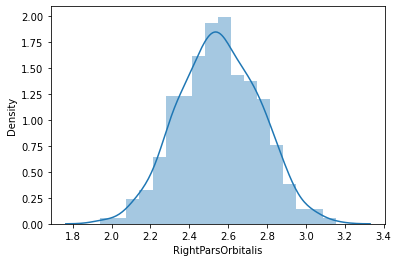

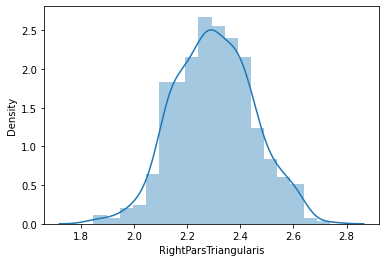

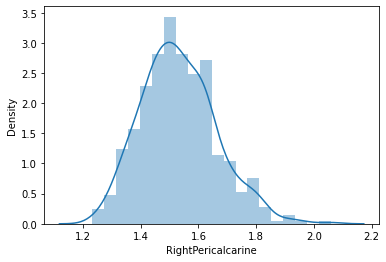

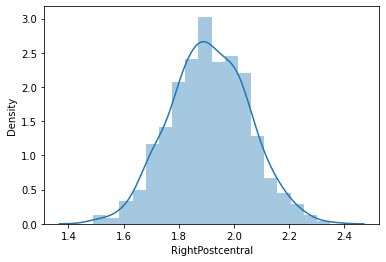

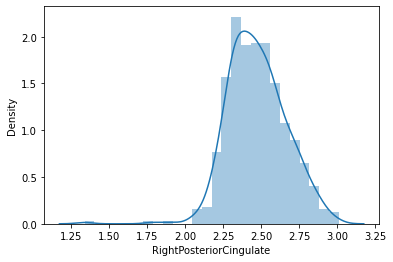

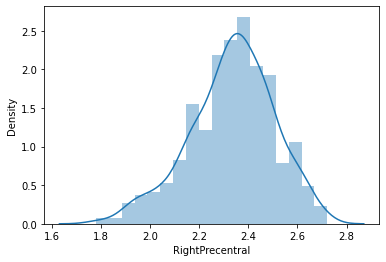

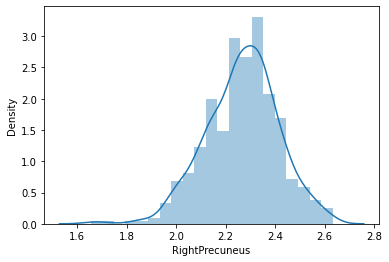

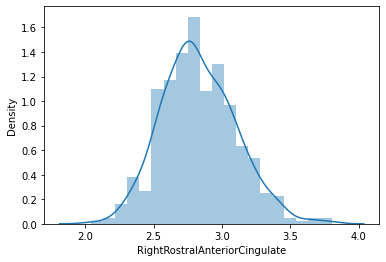

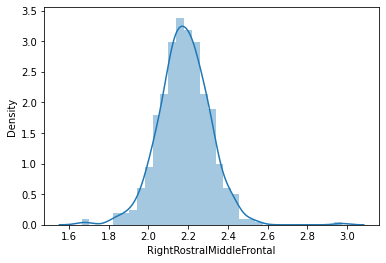

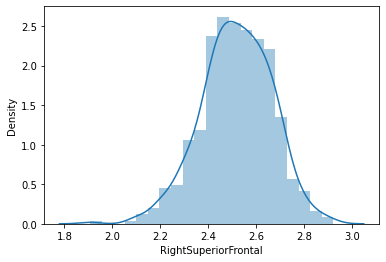

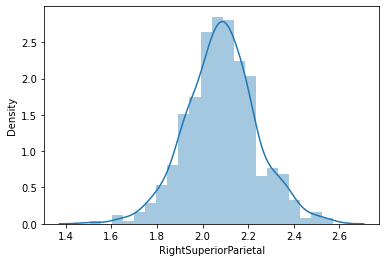

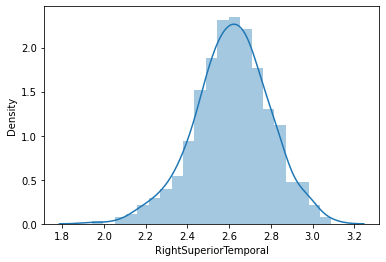

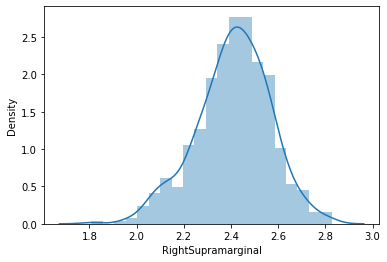

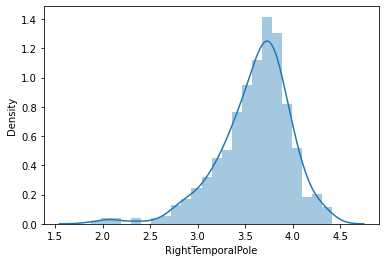

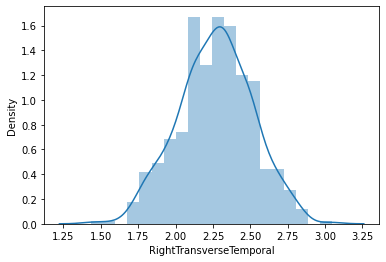

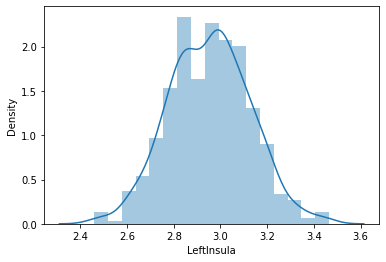

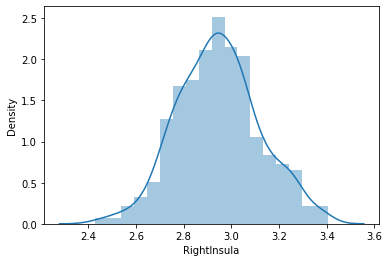

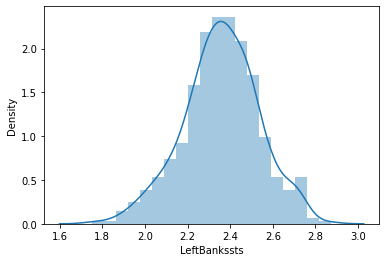

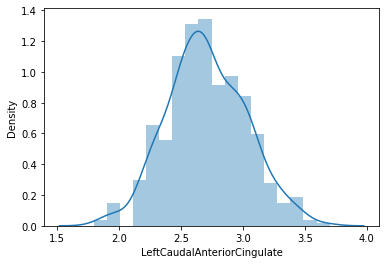

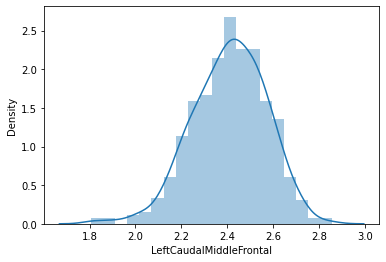

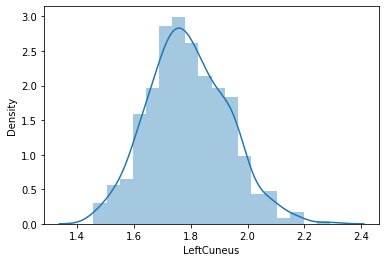

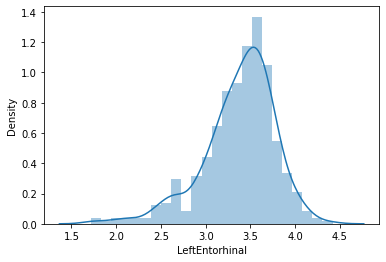

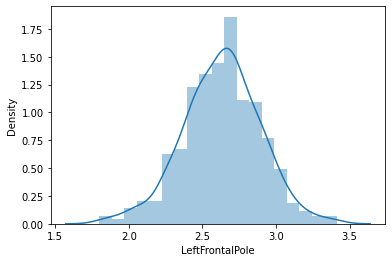

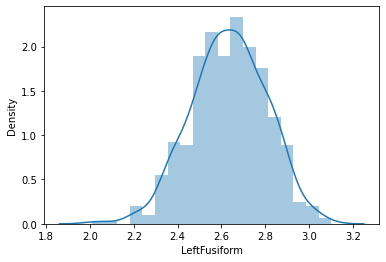

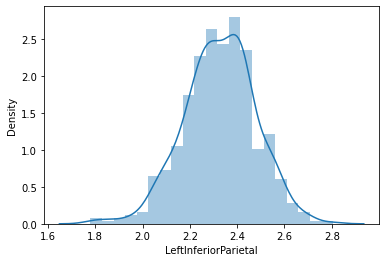

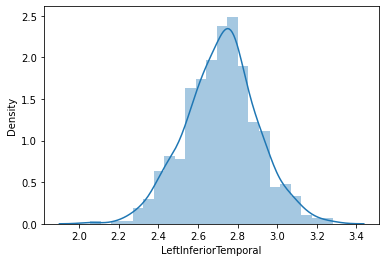

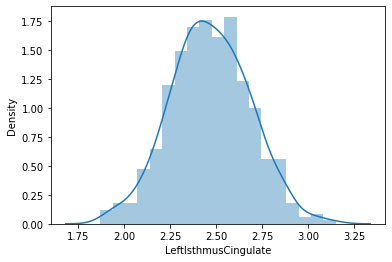

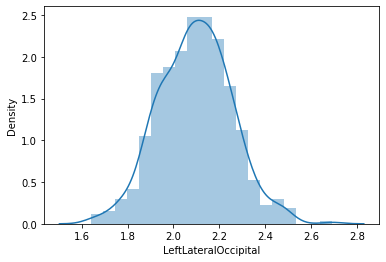

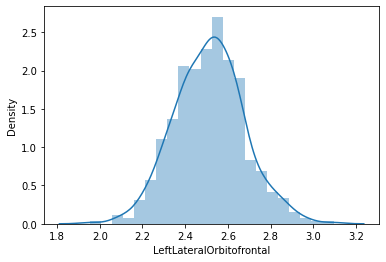

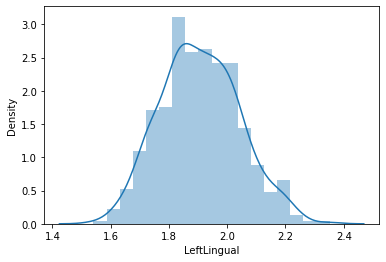

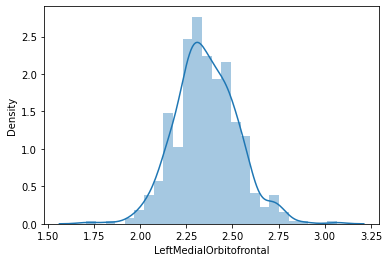

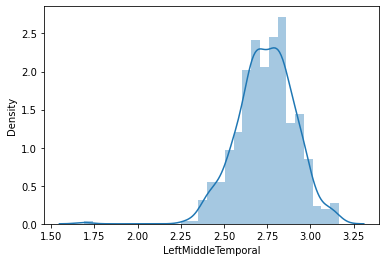

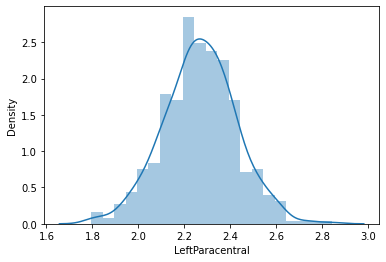

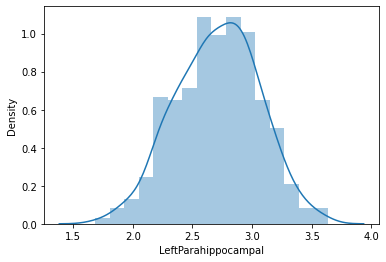

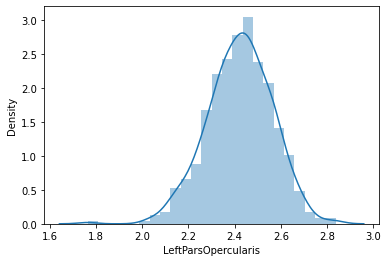

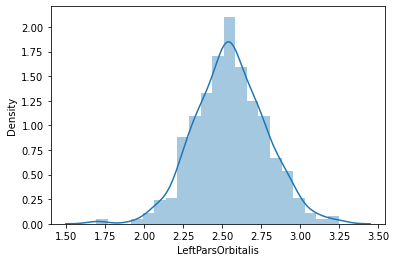

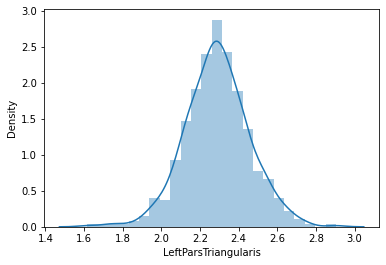

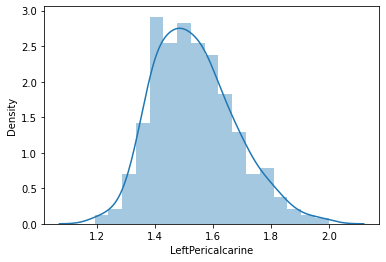

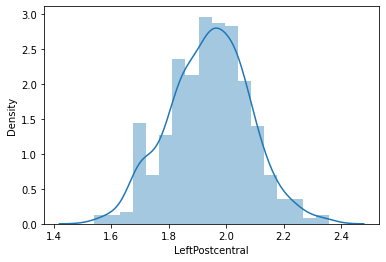

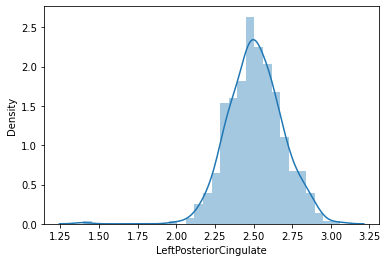

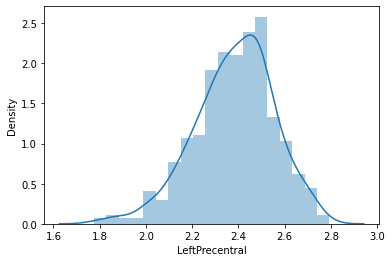

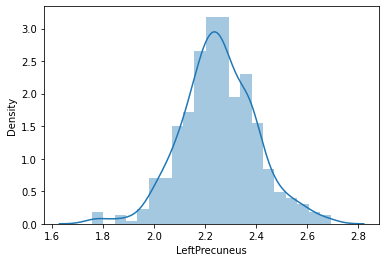

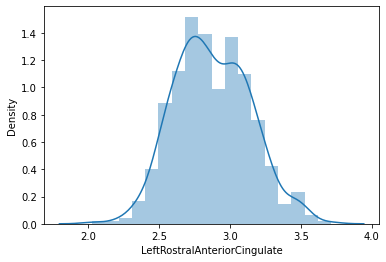

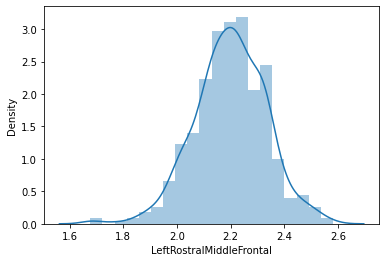

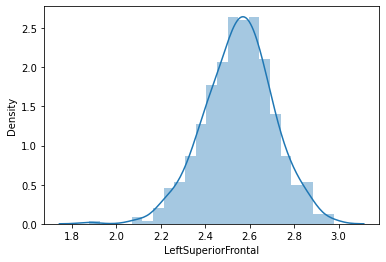

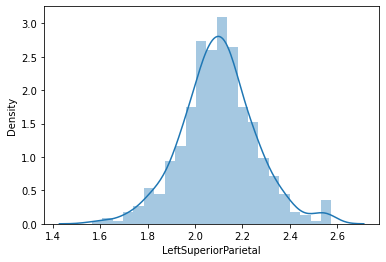

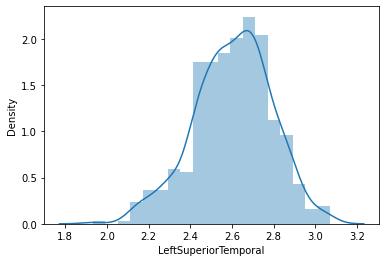

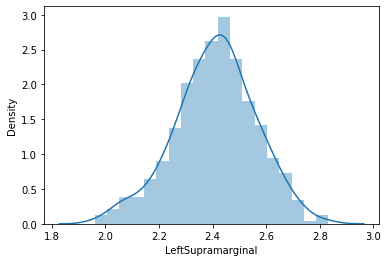

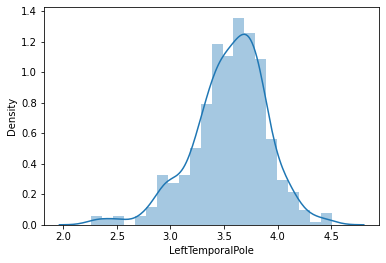

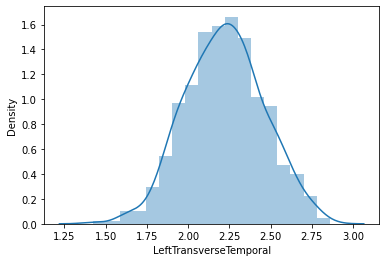

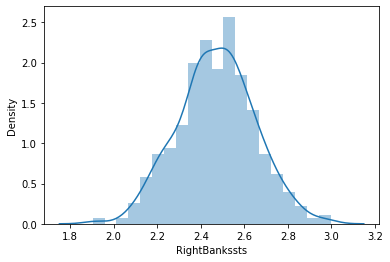

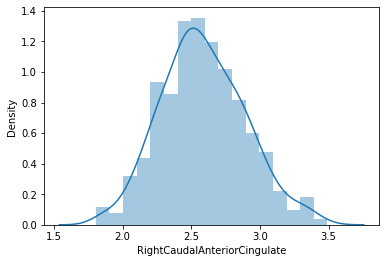

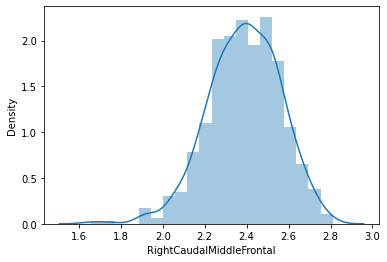

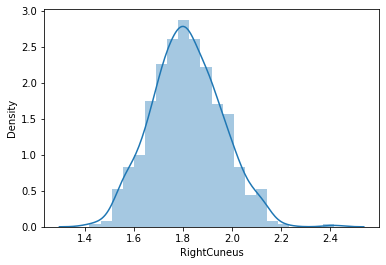

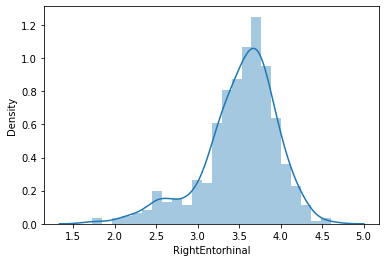

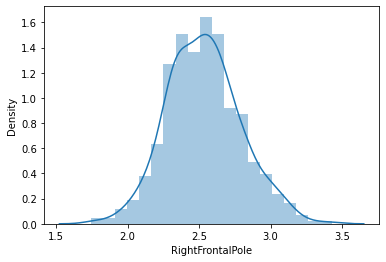

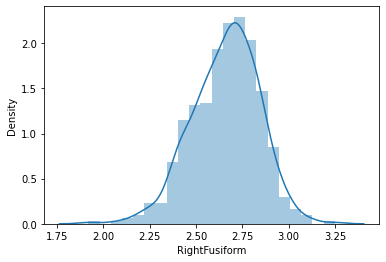

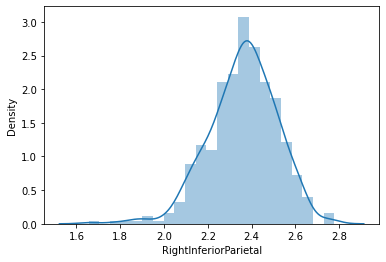

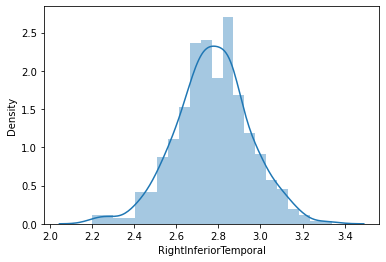

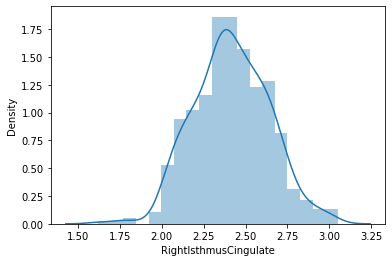

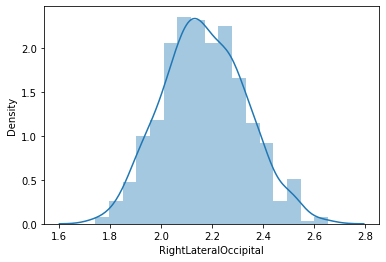

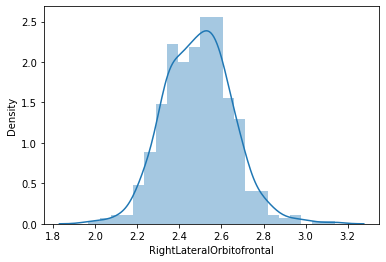

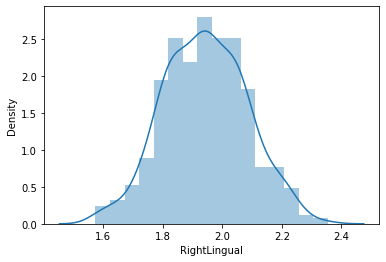

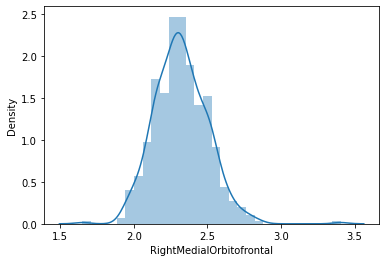

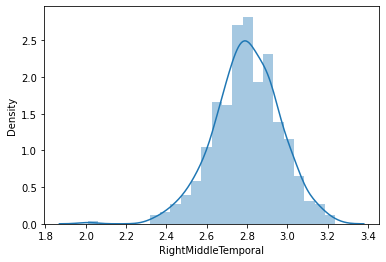

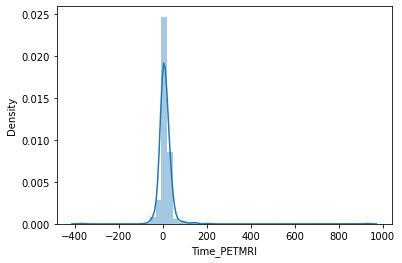

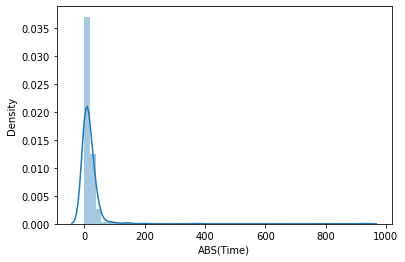

In [15]:
col = df.columns
for i in col:
  sns.distplot(df[i])
  plt.show()

In [17]:
df.columns

Index(['ID', 'Age', 'Sex', 'Edu', 'Dx', 'APOEe4', '111CUTOFF',
       'SupraTentorial', 'RightParacentral', 'RightParahippocampal',
       'RightParsOpercularis', 'RightParsOrbitalis', 'RightParsTriangularis',
       'RightPericalcarine', 'RightPostcentral', 'RightPosteriorCingulate',
       'RightPrecentral', 'RightPrecuneus', 'RightRostralAnteriorCingulate',
       'RightRostralMiddleFrontal', 'RightSuperiorFrontal',
       'RightSuperiorParietal', 'RightSuperiorTemporal', 'RightSupramarginal',
       'RightTemporalPole', 'RightTransverseTemporal', 'LeftInsula',
       'RightInsula', 'LeftBankssts', 'LeftCaudalAnteriorCingulate',
       'LeftCaudalMiddleFrontal', 'LeftCuneus', 'LeftEntorhinal',
       'LeftFrontalPole', 'LeftFusiform', 'LeftInferiorParietal',
       'LeftInferiorTemporal', 'LeftIsthmusCingulate', 'LeftLateralOccipital',
       'LeftLateralOrbitofrontal', 'LeftLingual', 'LeftMedialOrbitofrontal',
       'LeftMiddleTemporal', 'LeftParacentral', 'LeftParahippocampal',
 

In [11]:
data_heat = df[['Age', 'Sex', 'Edu', 'APOEe4', '111CUTOFF',
       'SupraTentorial', 'RightParacentral', 'RightParahippocampal',
       'RightParsOpercularis', 'RightParsOrbitalis', 'RightParsTriangularis',
       'RightPericalcarine', 'RightPostcentral', 'RightPosteriorCingulate',
       'RightPrecentral', 'RightPrecuneus', 'RightRostralAnteriorCingulate',
       'RightRostralMiddleFrontal', 'RightSuperiorFrontal',
       'RightSuperiorParietal', 'RightSuperiorTemporal', 'RightSupramarginal',
       'RightTemporalPole', 'RightTransverseTemporal', 'LeftInsula',
       'RightInsula', 'LeftBankssts', 'LeftCaudalAnteriorCingulate',
       'LeftCaudalMiddleFrontal', 'LeftCuneus', 'LeftEntorhinal',
       'LeftFrontalPole', 'LeftFusiform', 'LeftInferiorParietal',
       'LeftInferiorTemporal', 'LeftIsthmusCingulate', 'LeftLateralOccipital',
       'LeftLateralOrbitofrontal', 'LeftLingual', 'LeftMedialOrbitofrontal',
       'LeftMiddleTemporal', 'LeftParacentral', 'LeftParahippocampal',
       'LeftParsOpercularis', 'LeftParsOrbitalis', 'LeftParsTriangularis',
       'LeftPericalcarine', 'LeftPostcentral', 'LeftPosteriorCingulate',
       'LeftPrecentral', 'LeftPrecuneus', 'LeftRostralAnteriorCingulate',
       'LeftRostralMiddleFrontal', 'LeftSuperiorFrontal',
       'LeftSuperiorParietal', 'LeftSuperiorTemporal', 'LeftSupramarginal',
       'LeftTemporalPole', 'LeftTransverseTemporal', 'RightBankssts',
       'RightCaudalAnteriorCingulate', 'RightCaudalMiddleFrontal',
       'RightCuneus', 'RightEntorhinal', 'RightFrontalPole', 'RightFusiform',
       'RightInferiorParietal', 'RightInferiorTemporal',
       'RightIsthmusCingulate', 'RightLateralOccipital',
       'RightLateralOrbitofrontal', 'RightLingual', 'RightMedialOrbitofrontal',
       'RightMiddleTemporal']]

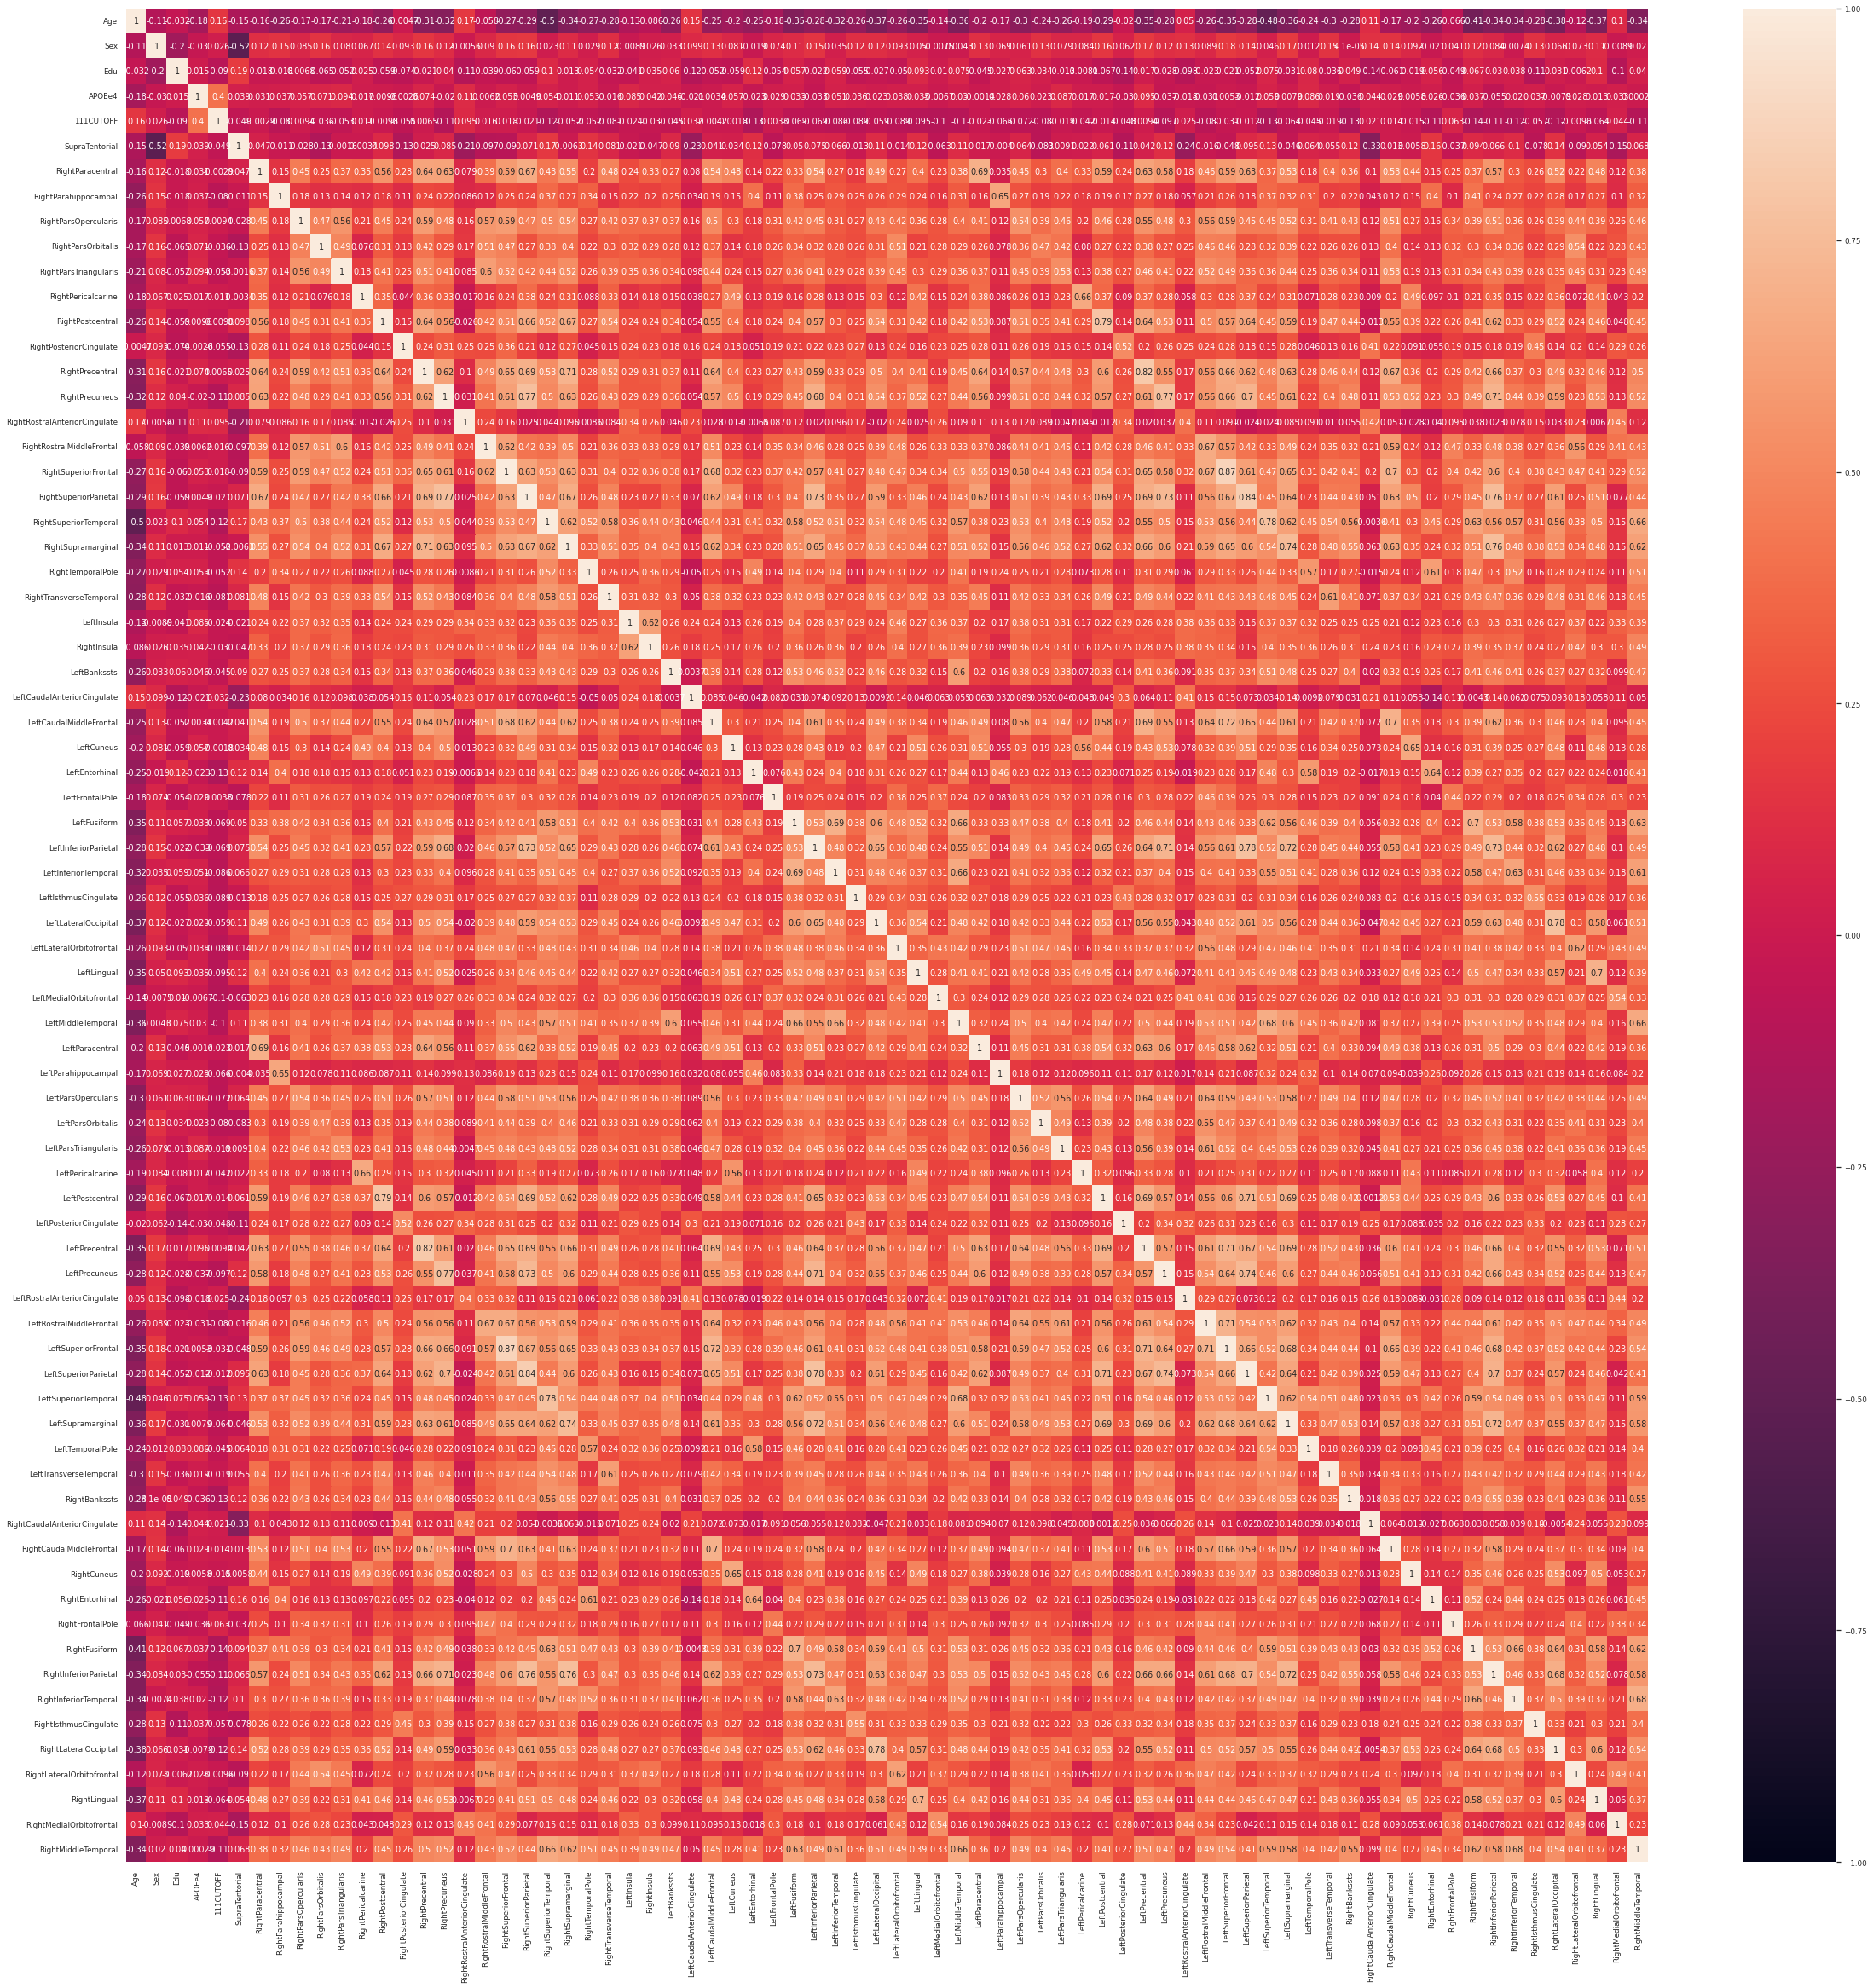

In [14]:
# df_corr = data_heat.corr(method='pearson')
plt.figure(figsize = (40,40))
sns.set(font_scale = 0.8) 
sns.heatmap(data_heat.astype(float).corr(), annot = True,
            vmin = -1, vmax = 1)

In [8]:
correlation_df =df.corr(method='pearson')
correlation_df.loc[abs(correlation_df['111CUTOFF']) > 0.1 , ['111CUTOFF']] 

,111CUTOFF
Age,0.157398
Dx,0.128905
APOEe4,0.403828
111CUTOFF,1.000000
RightPrecuneus,-0.112960
RightSuperiorTemporal,-0.123050
LeftEntorhinal,-0.134835
LeftMedialOrbitofrontal,-0.104899
LeftMiddleTemporal,-0.101369
LeftSuperiorTemporal,-0.131182
